This notebooks aims at a quick study comparing a couple of standard choices of BDT architectures from the ROOT TMVA framework to the HistGradientBoostingClassifier from scikit-learn. Three learning tasks are tested: the four default input features only, adding two guassian noise features and adding ten gaussian noise features.

The BDT settings are inspired from example code, such as https://root.cern/doc/master/TMVAClassification_8C.html and their configuration files are stored in `TMVA_configs/`. Any new TMVA BDT architecture can be added by creating another such YAML config file using the file name (without the `.yaml` extension) as the `model_identifier` argument during training.

Note that the training of the models can take quite long and thus one is encouraged to export the correspondoing cells into individual scripts and submit them to a HCP cluster. Each model is loaded again for evaluation and thus the training cells can be skipped when rerunning the notebook.

In order to run the study, both `ROOT` and `uproot` are required to be installed. This can be done via conda:
```bash
conda install -c conda-forge root
conda install -c conda-forge uproot
```

In [6]:
import numpy as np
from os.path import join
from utils import (load_lhco_rd, add_gaussian_features, train_model_multirun,
                   load_models_allruns, eval_ensemble, multi_roc_sigeffs)
from tmva_utils import train_tmva_multi, eval_tmva_multi
from plot_utils import plot_sic_curves

# Some global settings

In [5]:
# base directory to store all models
base_dir = "TMVA_comparison_study/"

# How often to re-run the entire ensemble training procedure
num_runs = 10

# How many models constitute a single ensemble
ensembles_per_model = 10

# cross-validation mode
cv_mode = "random"

# HGB-specific parameters
max_iters = 100
compute_val_weights = True

# Loading the data

In [3]:
# loading data and adding gaussian features
data = load_lhco_rd("./lhco_rd")
data_2g = add_gaussian_features(data, n_gaussians=2)
data_10g = add_gaussian_features(data, n_gaussians=10)

# Training the trees

The model training can also be done separately in a script, e.g. running on a HCP. In that case, one can skip the following training cells when evaluating the models.

## Training the TMVA BDTs

In [ ]:
_ = train_tmva_multi(
    data,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDT", root_file_dir_base=join(base_dir, "BDT_0G"))

In [ ]:
_ = train_tmva_multi(
    data_2g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDT", root_file_dir_base=join(base_dir, "BDT_2G"))

In [ ]:
_ = train_tmva_multi(
    data_10g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDT", root_file_dir_base=join(base_dir, "BDT_10G"))

In [ ]:
_ = train_tmva_multi(
    data,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTB", root_file_dir_base=join(base_dir, "BDTB_0G"))

In [ ]:
_ = train_tmva_multi(
    data_2g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTB", root_file_dir_base=join(base_dir, "BDTB_2G"))

In [ ]:
_ = train_tmva_multi(
    data_10g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTB", root_file_dir_base=join(base_dir, "BDTB_10G"))

In [ ]:
_ = train_tmva_multi(
    data,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTD", root_file_dir_base=join(base_dir, "BDTD_0G"))

In [ ]:
_ = train_tmva_multi(
    data_2g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTD", root_file_dir_base=join(base_dir, "BDTD_2G"))

In [ ]:
_ = train_tmva_multi(
    data_10g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTD", root_file_dir_base=join(base_dir, "BDTD_10G"))

In [ ]:
_ = train_tmva_multi(
    data,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTG", root_file_dir_base=join(base_dir, "BDTG_0G"))

In [ ]:
_ = train_tmva_multi(
    data_2g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTG", root_file_dir_base=join(base_dir, "BDTG_2G"))

In [ ]:
_ = train_tmva_multi(
    data_10g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, cv_mode=cv_mode,
    model_identifier="BDTG", root_file_dir_base=join(base_dir, "BDTG_10G"))

## Training the HGB benchmark classifiers

In [ ]:
_, models_hgb_0g = train_model_multirun(
    data,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model,
    max_iters=max_iters, model_type="HGB", compute_val_weights=True,
    save_model_dir=join(base_dir, "HGB_0G"),
    cv_mode=cv_mode, early_stopping=True)

In [ ]:
_, models_hgb_2g = train_model_multirun(
    data_2g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model,
    max_iters=max_iters, model_type="HGB", compute_val_weights=True,
    save_model_dir=join(base_dir, "HGB_2G"),
    cv_mode=cv_mode, early_stopping=True)

In [ ]:
_, models_hgb_10g = train_model_multirun(
    data_10g,
    num_runs=num_runs, ensembles_per_model=ensembles_per_model,
    max_iters=max_iters, model_type="HGB", compute_val_weights=True,
    save_model_dir=join(base_dir, "HGB_10G"),
    cv_mode=cv_mode, early_stopping=True)

# Computing predictions

## Evaluate TMVA BDTs

In the case of the TMVA models, the evaluation can be somewhat lengthy as the pyROOT implementation here includes a python for loop over events. Once done, these cells store the test set predictions on disk and can be skipped when rerunning the notebook. There are cells loading the predictions from disk further below.

In [ ]:
predictions_bdt_0g = eval_tmva_multi(
    data, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDT",
    root_file_dir_base=join(base_dir, "BDT_0G"), save_ensemble_preds=True)

predictions_bdt_2g = eval_tmva_multi(
    data_2g, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDT",
    root_file_dir_base=join(base_dir, "BDT_2G"), save_ensemble_preds=True)

predictions_bdt_10g = eval_tmva_multi(
    data_10g, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDT",
    root_file_dir_base=join(base_dir, "BDT_10G"), save_ensemble_preds=True)

In [ ]:
predictions_bdtb_0g = eval_tmva_multi(
    data, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTB",
    root_file_dir_base=join(base_dir, "BDTB_0G"), save_ensemble_preds=True)

predictions_bdtb_2g = eval_tmva_multi(
    data_2g, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTB",
    root_file_dir_base=join(base_dir, "BDTB_2G"), save_ensemble_preds=True)

predictions_bdtb_10g = eval_tmva_multi(
    data_10g, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTB",
    root_file_dir_base=join(base_dir, "BDTB_10G"), save_ensemble_preds=True)

In [ ]:
predictions_bdtd_0g = eval_tmva_multi(
    data, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTD",
    root_file_dir_base=join(base_dir, "BDTD_0G"), save_ensemble_preds=True)

predictions_bdtd_2g = eval_tmva_multi(
    data_2g, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTD",
    root_file_dir_base=join(base_dir, "BDTD_2G"), save_ensemble_preds=True)

predictions_bdtd_10g = eval_tmva_multi(
    data_10g, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTD",
    root_file_dir_base=join(base_dir, "BDTD_10G"), save_ensemble_preds=True)

In [ ]:
predictions_bdtg_0g = eval_tmva_multi(
    data, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTG",
    root_file_dir_base=join(base_dir, "BDTG_0G"), save_ensemble_preds=True)

predictions_bdtg_2g = eval_tmva_multi(
    data_2g, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTG",
    root_file_dir_base=join(base_dir, "BDTG_2G"), save_ensemble_preds=True)

predictions_bdtg_10g = eval_tmva_multi(
    data_10g, 
    num_runs=num_runs, ensembles_per_model=ensembles_per_model, model_identifier="BDTG",
    root_file_dir_base=join(base_dir, "BDTG_10G"), save_ensemble_preds=True)

## Evaluate HGB benchmark

In [12]:
# Loading the models from disk in case the notebook was restarted.
# Does not need to be run in case the notebook is run from top to bottom.

models_hgb_0g = load_models_allruns(join(base_dir, "HGB_0G"))
models_hgb_2g = load_models_allruns(join(base_dir, "HGB_2G"))
models_hgb_10g = load_models_allruns(join(base_dir, "HGB_10G"))

In [13]:
predictions_hgb_0g = eval_ensemble(
    models_hgb_0g, data, model_type="HGB")

predictions_hgb_2g = eval_ensemble(
    models_hgb_2g, data_2g, model_type="HGB")

predictions_hgb_10g = eval_ensemble(
    models_hgb_10g, data_10g, model_type="HGB")

## Shortcut to skip costly live evaluation on TMVA BDTs

The following two cells are just needed in case the TMVA tree evaluation has been run already and the notebook was restarted in the meanwhile. In that case the test set predictions are simply read from disk.

In [14]:
def load_predictions_tmva(num_runs, root_file_dir_base):
    predictions = []
    for i in range(num_runs):
        predictions.append(np.load(join(f"{root_file_dir_base}_{i}",
                                        f"ensemble_preds_run{i}.npy")))
    return np.stack(np.mean(predictions, axis=0), axis=0)

In [8]:
predictions_bdt_0g = load_predictions_tmva(num_runs, join(base_dir, "BDT_0G"))
predictions_bdt_2g = load_predictions_tmva(num_runs, join(base_dir, "BDT_2G"))
predictions_bdt_10g = load_predictions_tmva(num_runs, join(base_dir, "BDT_10G"))

predictions_bdtb_0g = load_predictions_tmva(num_runs, join(base_dir, "BDTB_0G"))
predictions_bdtb_2g = load_predictions_tmva(num_runs, join(base_dir, "BDTB_2G"))
predictions_bdtb_10g = load_predictions_tmva(num_runs, join(base_dir, "BDTB_10G"))

predictions_bdtd_0g = load_predictions_tmva(num_runs, join(base_dir, "BDTD_0G"))
predictions_bdtd_2g = load_predictions_tmva(num_runs, join(base_dir, "BDTD_2G"))
predictions_bdtd_10g = load_predictions_tmva(num_runs, join(base_dir, "BDTD_10G"))

predictions_bdtg_0g = load_predictions_tmva(num_runs, join(base_dir, "BDTG_0G"))
predictions_bdtg_2g = load_predictions_tmva(num_runs, join(base_dir, "BDTG_2G"))
predictions_bdtg_10g = load_predictions_tmva(num_runs, join(base_dir, "BDTG_10G"))

# Performance comparison

In [ ]:
print("working on BDT...")
tpr_bdt_0g, fpr_bdt_0g = multi_roc_sigeffs(predictions_bdt_0g, data["y_test"])
tpr_bdt_2g, fpr_bdt_2g = multi_roc_sigeffs(predictions_bdt_2g, data["y_test"])
tpr_bdt_10g, fpr_bdt_10g = multi_roc_sigeffs(predictions_bdt_10g, data["y_test"])

print("working on BDTB...")
tpr_bdtb_0g, fpr_bdtb_0g = multi_roc_sigeffs(predictions_bdtb_0g, data["y_test"])
tpr_bdtb_2g, fpr_bdtb_2g = multi_roc_sigeffs(predictions_bdtb_2g, data["y_test"])
tpr_bdtb_10g, fpr_bdtb_10g = multi_roc_sigeffs(predictions_bdtb_10g, data["y_test"])

print("working on BDTD...")
tpr_bdtd_0g, fpr_bdtd_0g = multi_roc_sigeffs(predictions_bdtd_0g, data["y_test"])
tpr_bdtd_2g, fpr_bdtd_2g = multi_roc_sigeffs(predictions_bdtd_2g, data["y_test"])
tpr_bdtd_10g, fpr_bdtd_10g = multi_roc_sigeffs(predictions_bdtd_10g, data["y_test"])

print("working on BDTG...")
tpr_bdtg_0g, fpr_bdtg_0g = multi_roc_sigeffs(predictions_bdtg_0g, data["y_test"])
tpr_bdtg_2g, fpr_bdtg_2g = multi_roc_sigeffs(predictions_bdtg_2g, data["y_test"])
tpr_bdtg_10g, fpr_bdtg_10g = multi_roc_sigeffs(predictions_bdtg_10g, data["y_test"])

print("working on HGB...")
tpr_hgb_0g, fpr_hgb_0g = multi_roc_sigeffs(predictions_hgb_0g, data["y_test"])
tpr_hgb_2g, fpr_hgb_2g = multi_roc_sigeffs(predictions_hgb_2g, data["y_test"])
tpr_hgb_10g, fpr_hgb_10g = multi_roc_sigeffs(predictions_hgb_10g, data["y_test"])

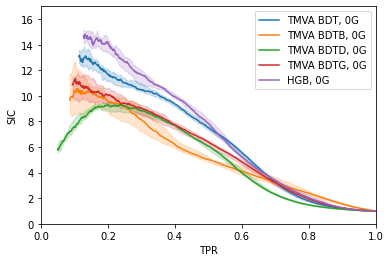

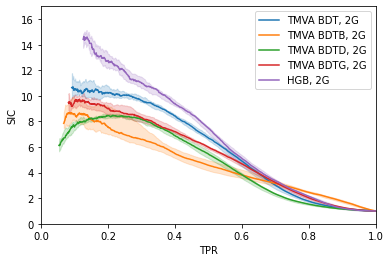

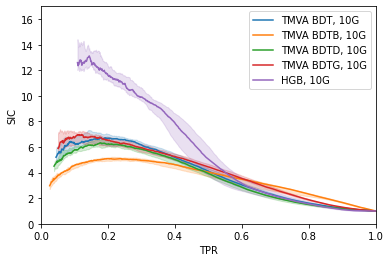

In [23]:
with np.errstate(divide='ignore', invalid='ignore'):  # ignoring annoying warnings
        plot_sic_curves([tpr_bdt_0g, tpr_bdtb_0g, tpr_bdtd_0g, tpr_bdtg_0g, tpr_hgb_0g],
                        [fpr_bdt_0g, fpr_bdtb_0g, fpr_bdtd_0g, fpr_bdtg_0g, fpr_hgb_0g],
                        5*[data["y_test"]],
                        out_filename=join(base_dir, "TMVA_BDT_vs_HGB_0G.pdf"),
                        labels=["TMVA BDT, 0G", "TMVA BDTB, 0G", "TMVA BDTD, 0G",
                                "TMVA BDTG, 0G", "HGB, 0G"],
                        max_y=17)
        plot_sic_curves([tpr_bdt_2g, tpr_bdtb_2g, tpr_bdtd_2g, tpr_bdtg_2g, tpr_hgb_2g],
                        [fpr_bdt_2g, fpr_bdtb_2g, fpr_bdtd_2g, fpr_bdtg_2g, fpr_hgb_2g],
                        5*[data["y_test"]],
                        out_filename=join(base_dir, "TMVA_BDT_vs_HGB_2G.pdf"),
                        labels=["TMVA BDT, 2G", "TMVA BDTB, 2G", "TMVA BDTD, 2G",
                                "TMVA BDTG, 2G", "HGB, 2G"],
                        max_y=17)
        plot_sic_curves([tpr_bdt_10g, tpr_bdtb_10g, tpr_bdtd_10g, tpr_bdtg_10g, tpr_hgb_10g],
                        [fpr_bdt_10g, fpr_bdtb_10g, fpr_bdtd_10g, fpr_bdtg_10g, fpr_hgb_10g],
                        5*[data["y_test"]],
                        out_filename=join(base_dir, "TMVA_BDT_vs_HGB_10G.pdf"),
                        labels=["TMVA BDT, 10G", "TMVA BDTB, 10G", "TMVA BDTD, 10G",
                                "TMVA BDTG, 10G", "HGB, 10G"],
                        max_y=17)